[Text(152.91346153846155, 199.32, 'X[4] <= 0.5\nentropy = 0.961\nsamples = 596\nvalue = [367, 229]'),
 Text(67.60384615384615, 163.07999999999998, 'X[1] <= 6.5\nentropy = 0.66\nsamples = 380\nvalue = [315, 65]'),
 Text(25.753846153846155, 126.83999999999999, 'X[2] <= 2.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(12.876923076923077, 90.6, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(38.63076923076923, 90.6, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(109.45384615384616, 126.83999999999999, 'X[0] <= 1.5\nentropy = 0.613\nsamples = 364\nvalue = [309, 55]'),
 Text(64.38461538461539, 90.6, 'X[1] <= 51.5\nentropy = 0.89\nsamples = 78\nvalue = [54, 24]'),
 Text(38.63076923076923, 54.359999999999985, 'X[3] <= 1.5\nentropy = 0.947\nsamples = 63\nvalue = [40, 23]'),
 Text(25.753846153846155, 18.119999999999976, 'entropy = 0.918\nsamples = 60\nvalue = [40, 20]'),
 Text(51.50769230769231, 18.119999999999976, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(90.

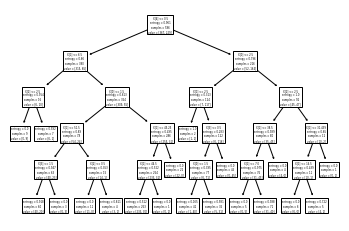

In [66]:
# CAP 5630 HW2
# Josh E.

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os


# assumes csv's are in the same directory
train_data = pd.read_csv(os.getcwd() + "\\train.csv")

# data preprocessing

first_class = train_data.loc[train_data.Pclass == 1]["Survived"]
#print("rate:", sum(first_class)/len(first_class))
# Survival rate of first-class: 0.6296296296296297

second_class = train_data.loc[train_data.Pclass == 2]["Survived"]
#print("rate:", sum(second_class)/len(second_class))
# Survival rate of second-class: 0.47282608695652173

third_class = train_data.loc[train_data.Pclass == 3]["Survived"]
#print("rate:", sum(third_class)/len(third_class))
# Survival rate of third-class: 0.24236252545824846

women = train_data.loc[train_data.Sex == 'female']["Survived"]
#print("rate:", sum(women)/len(women))
# Survival rate of women: 0.7420382165605095

men = train_data.loc[train_data.Sex == 'male']["Survived"]
#print("rate:", sum(men)/len(men))
# survival rate of men: 0.18890814558058924

all_ages = train_data[["Age", "Survived"]]
Age_Survived = [0] * (int(all_ages["Age"].max()) + 1) # indexes are age
Age_Died = [0] * (int(all_ages["Age"].max()) + 1)
for i in range(len(all_ages["Age"])):
    
    # remove people without age from analysis (177 missing, 714 valid)
    passenger_age = all_ages["Age"][i]
    if math.isnan(passenger_age):
        continue
    passenger_age = int(passenger_age)
    if all_ages["Survived"][passenger_age] == 1:
        Age_Survived[passenger_age] +=1
    else:
        Age_Died[passenger_age] +=1

age_range = 10
Age_Survival_Rate = [0] * (int(all_ages["Age"].max() / age_range) + 1) # For each age, list the survival rate within their age range

for i in range(len(Age_Survival_Rate)):
    #total_people = 0;
    total_survived = 0;
    for j in range(age_range):
        if i*age_range + j >= len(Age_Survived):
            break;
        #total_people = total_people + Age_Survived[i*age_range + j] + Age_Died[i*age_range + j]
        total_survived = total_survived + Age_Survived[i*age_range + j]
    Age_Survival_Rate[i] = total_survived / (sum(Age_Survived) + sum(Age_Died)) 
    
#print(Age_Survival_Rate)
#xdata = np.arange(start = 0, step = age_range, stop = len(Age_Survival_Rate) * age_range)
#plt.plot(xdata, Age_Survival_Rate)
#plt.show()
# age shows some sign of survivorship. A passenger is more likely to survive if he/she is of the ages 15 - 30. More generally, a passenger is more likely to survive if he/she is younger.

SibSp = train_data[["SibSp", "Survived"]]
SibSp_Survived = [0] * (int(SibSp["SibSp"].max()) + 1) # indexes are number of SibSp
SibSp_Died = [0] * (int(SibSp["SibSp"].max()) + 1)
for i in range(len(SibSp["SibSp"])):
    passenger_SibSp = SibSp["SibSp"][i]
    passenger_SibSp = int(passenger_SibSp)
    if SibSp["Survived"][passenger_SibSp] == 1:
        SibSp_Survived[passenger_SibSp] +=1
    else:
        SibSp_Died[passenger_SibSp] +=1

SibSp_Range = 2
SibSp_Survival_Rate = [0] * (int(SibSp["SibSp"].max() / SibSp_Range) + 1) # For each number of siblings, list the survival rate within their range


for i in range(len(SibSp_Survival_Rate)):
    total_survived = 0;
    for j in range(SibSp_Range):
        if i*SibSp_Range + j >= len(SibSp_Survived):
            break;
        total_survived = total_survived + SibSp_Survived[i*SibSp_Range + j]
    SibSp_Survival_Rate[i] = total_survived / (sum(SibSp_Survived) + sum(SibSp_Died)) 
    
#print(SibSp_Survival_Rate)
#xdata = np.arange(start = 0, step = SibSp_Range, stop = len(SibSp_Survival_Rate) * SibSp_Range)
#plt.plot(xdata, SibSp_Survival_Rate)
#plt.show()
# plot of number of SibSp vs Survival Rate indicates negative trend, but must consider that families with more sibling are rarer, which can skew data


Parch = train_data[["Parch", "Survived"]]
Parch_Survived = [0] * (int(Parch["Parch"].max()) + 1)
Parch_Died = [0] * (int(Parch["Parch"].max()) + 1)
for i in range(len(Parch["Parch"])):
    passenger_Parch = Parch["Parch"][i]
    passenger_Parch = int(passenger_Parch)
    if Parch["Survived"][passenger_Parch] == 1:
        Parch_Survived[passenger_Parch] +=1
    else:
        Parch_Died[passenger_Parch] +=1

Parch_Survival_Rate = [0] * (int(Parch["Parch"].max()) + 1)
for i in range(len(Parch_Survival_Rate)):
    Parch_Survival_Rate[i] = Parch_Survived[i] / (sum(Parch_Survived) + sum(Parch_Died)) 

#xdata = np.arange(start = 0, step = 1, stop = len(Parch_Survival_Rate))
#plt.scatter(xdata, Parch_Survival_Rate)
#plt.show()
# Shows the father and daughters are most likely to survive

from sklearn import tree
from sklearn.model_selection import train_test_split

drop_columns = ["Survived", "PassengerId", "Name", "Ticket", "Cabin", "Embarked", "Fare"]


X_train, X_test, y_train, y_test = train_test_split(train_data.drop(drop_columns, axis=1, inplace=False), train_data[["Survived"]], test_size=0.33)
X_train["Age"] = X_train["Age"].fillna(X_train["Age"].mean())
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

decision_tree = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion="entropy")

decision_tree.fit(X_train, y_train)
tree.plot_tree(decision_tree)

In [75]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(decision_tree, X_train, y_train, cv=5)
print("Average Classification Accuracy for Decision Tree: %f" % cv_score.mean())

Average Classification Accuracy for Decision Tree: 0.812059


In [106]:
from sklearn.ensemble import RandomForestClassifier

random_forest_tree = RandomForestClassifier(max_depth=10, min_samples_split=10, criterion="entropy")
random_forest_tree.fit(X_train, y_train.values.ravel())

print("Average Classification Accuracy for Random Forest Tree: %f" % random_forest_tree.score(X_test, y_test))

Average Classification Accuracy for Random Forest Tree: 0.813559
